# DSC4001-01 Exercise 10

**This exercise notebook will go through the Data Visualization**

* [Matplotlib](https://matplotlib.org/) is a comprehensive library for creating static, animated, and interactive visualizations in Python. It tries to replicate MatLab's plotting capabilities in Python. It is an excellent 2D and 3D graphics library for generating scientific figures. Let's learn how to use it!




In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)

## Import

Import ``matplotlib.pyplot`` module under the name ``plt`.

In [ ]:
import matplotlib.pyplot as plt

## Histogram Plots

A histogram can display the distribution of a (continuous) variable.

**``plt.hist()``**: Plot a histogram of ``x``.
  * ``x``: data (array)
  * ``bins``: the number of equal-width bins, or a sequence that defined the bind edges
  * ``alpha``: transparency
  * ``histtype``: 'bar', 'barstacked', 'step', 'stepfilled'
  * `label`: sstrings to match multiple datasets
  * `density`: return a probability density (True), or raw count (False)
  * `rwidth`: the relative width of the bars as a fraction of the bin width 


In [ ]:
mu = 100
sigma = 15
x = mu + sigma * np.random.randn(437)

x.shape

(437,)

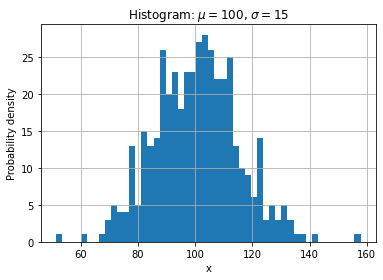

In [ ]:
num_bins = 50

fig, ax = plt.subplots()

n, bins, patches = ax.hist(x, num_bins)

ax.set_xlabel('x')
ax.set_ylabel('Probability density')
ax.set_title(r'Histogram: $\mu=100$, $\sigma=15$')

plt.grid()
plt.show()

In [ ]:
mu_x = 200
sigma_x = 25
x = np.random.normal(mu_x, sigma_x, size=100)

mu_w = 200
sigma_w = 10
w = np.random.normal(mu_w, sigma_w, size=100)

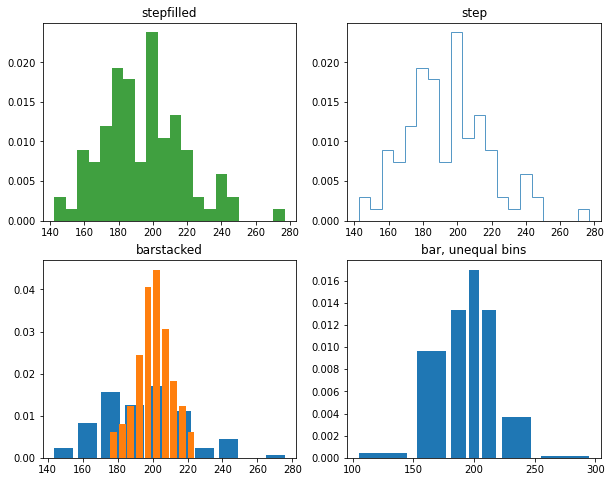

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

axs[0, 0].hist(x, 20, density=True, histtype='stepfilled', facecolor='g', alpha=0.75)
axs[0, 0].set_title('stepfilled')

axs[0, 1].hist(x, 20, density=True, histtype='step', facecolor='g', alpha=0.75)
axs[0, 1].set_title('step')

axs[1, 0].hist(x, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].hist(w, density=True, histtype='barstacked', rwidth=0.8)
axs[1, 0].set_title('barstacked')

bins = [100, 150, 180, 195, 205, 220, 250, 300]
axs[1, 1].hist(x, bins, density=True, histtype='bar', rwidth=0.8)
axs[1, 1].set_title('bar, unequal bins')

plt.show()

In [ ]:
n_bins = 10
x = np.random.randn(1000, 3)
x.shape

(1000, 3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


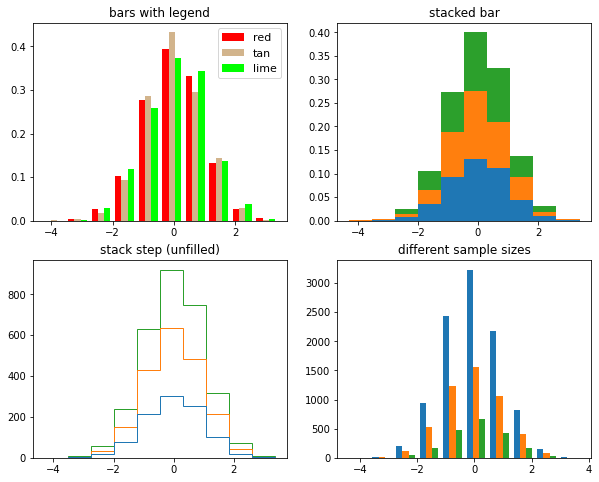

In [ ]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

colors = ['red', 'tan', 'lime']
ax0.hist(x, n_bins, density=True, histtype='bar', color=colors, label=colors)
ax0.legend(prop={'size': 11})
ax0.set_title('bars with legend')

ax1.hist(x, n_bins, density=True, histtype='bar', stacked=True)
ax1.set_title('stacked bar')

ax2.hist(x, n_bins, histtype='step', stacked=True, fill=False)
ax2.set_title('stack step (unfilled)')

x_multi = [np.random.randn(n) for n in [10000, 5000, 2000]]
ax3.hist(x_multi, n_bins, histtype='bar')
ax3.set_title('different sample sizes')

plt.show()

**``plt.hist2d()``**: Plot two-dimensional histogram. 

  * ``x``, ``y``: array-like input values
  * ``bins``: int or [int, int]: bins in each dimension
  * ``cmap``: colormap 

In [ ]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

print(x.shape)
print(y.shape)

(10000,)
(10000,)


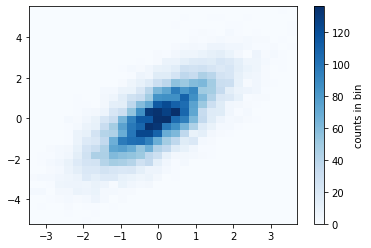

In [ ]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

plt.show()

## Bar Plots

**``plt.bar()``**: Make a bar plot. 

* ``x``: the bars are positioned at `x`
* ``height``: the heights of the bars (arrray)
* ``width``,``bottom``: the widths, and the $y$ coordinates of the bars
* `color`, `edgecolor`, `linewidth`
* `xerr`, `yerr`: horizontal / vertical errorbars to the bar tips

In [ ]:
labels = ['G1', 'G2', 'G3', 'G4', 'G5']
x = np.arange(len(labels))  

men_means = [20, 34, 30, 35, 27]
women_means = [25, 32, 34, 20, 25]

width = 0.35

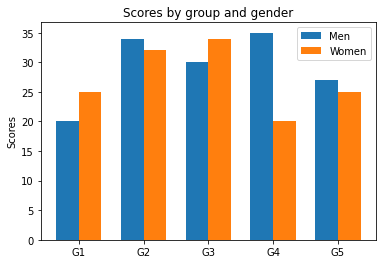

In [ ]:
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Men')
rects2 = ax.bar(x + width/2, women_means, width, label='Women')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

In [ ]:
N = 5
ind = np.arange(N)    

menMeans = (20, 35, 30, 35, -27)
womenMeans = (25, 32, 34, 20, -25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)

width = 0.35       

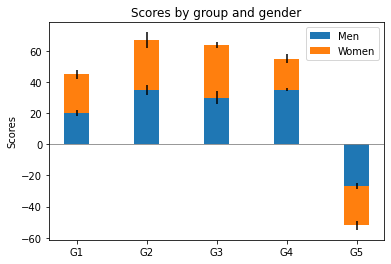

In [ ]:
fig, ax = plt.subplots()

p1 = ax.bar(ind, menMeans, width, yerr=menStd, label='Men')
p2 = ax.bar(ind, womenMeans, width, bottom=menMeans, yerr=womenStd, label='Women')

ax.axhline(0, color='grey', linewidth=0.8)
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind)
ax.set_xticklabels(('G1', 'G2', 'G3', 'G4', 'G5'))
ax.legend()

plt.show()

## Error bar Plots

**``plt.errorbar()``**: Plot $y$ versus $x$ as lines and /or markers with attached errorbars

* `x`,`y`: data positions
* `xerr`, `yerr`: the errorbar sizes
* `ecolor`, `elinewidth`: color, linewidth of the errorbar 
* `capsize`: length of the error bar caps in points 

In [ ]:
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

error = 0.1 + 0.2 * x
lower_error = 0.4 * error
upper_error = error

print(x)
print(y)
print(error)
print(lower_error)
print(upper_error)

[0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6]
[0.90483742 0.54881164 0.33287108 0.20189652 0.12245643 0.07427358
 0.0450492  0.02732372]
[0.12 0.22 0.32 0.42 0.52 0.62 0.72 0.82]
[0.048 0.088 0.128 0.168 0.208 0.248 0.288 0.328]
[0.12 0.22 0.32 0.42 0.52 0.62 0.72 0.82]


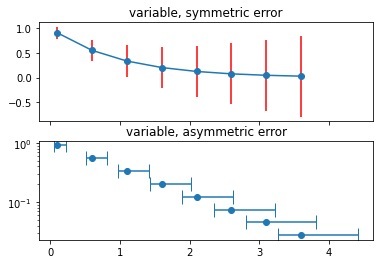

In [ ]:
fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o', ecolor='r')
ax0.set_title('variable, symmetric error')

asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o', capsize=7)
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
plt.show()

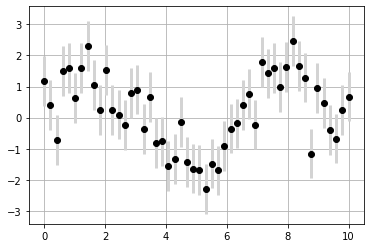

In [ ]:
x = np.linspace(0, 10, 50)
y_err = 0.8
y = np.sin(x) + y_err * np.random.randn(50)

plt.errorbar(x, y, yerr=y_err, fmt='o', color='black', ecolor='lightgray', elinewidth=3, capsize=0);
plt.grid()
plt.show()

**``.fill_between()``**: Fill the area between two horizontal curves $(x,y1)$ and $(x,y2)$. 

Use this function to plot *confidence bands*.

In [ ]:
N = 21
x = np.linspace(0, 10, 11)
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]

y_est = 0.88 * x + 6.42

y_err = x.std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))

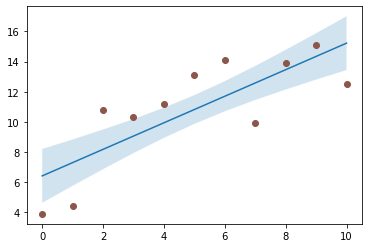

In [ ]:
fig, ax = plt.subplots()

ax.plot(x, y_est, '-')
ax.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2)
ax.plot(x, y, 'o', color='tab:brown')

plt.show()

## Box Plots

**``plt.boxplot()``**: Create box plots. The box extends from the lower to upper quartile values of the data, with a line at the median. 

* `x`: data
* `notch`: True or False
* `sym`: symbol of the flier points
* `vert`: vertical or horizontal box


In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

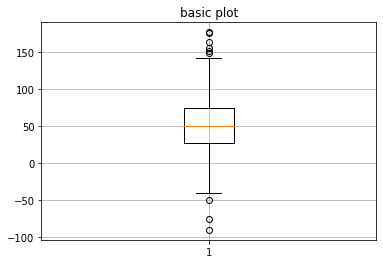

In [ ]:
fig, axs = plt.subplots(1)

# basic plot
axs.boxplot(data)
axs.set_title('basic plot')
plt.grid()

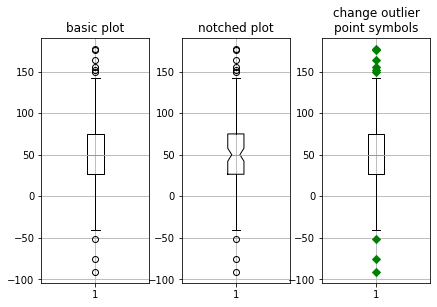

In [ ]:
fig, axs = plt.subplots(1, 3)

# basic plot
axs[0].boxplot(data)
axs[0].set_title('basic plot')
axs[0].grid()

# notched plot
axs[1].boxplot(data, 1)
axs[1].set_title('notched plot')
axs[1].grid()

# change outlier point symbols
axs[2].boxplot(data, 0, 'gD')
axs[2].set_title('change outlier\npoint symbols')
axs[2].grid()

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)


plt.show()

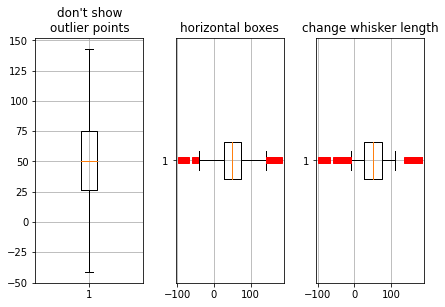

In [ ]:
fig, axs = plt.subplots(1, 3)

# don't show outlier points
axs[0].boxplot(data, 0, '')
axs[0].set_title("don't show\noutlier points")
axs[0].grid()

# horizontal boxes
axs[1].boxplot(data, 0, 'rs', 0)
axs[1].set_title('horizontal boxes')
axs[1].grid()

# change whisker length
axs[2].boxplot(data, 0, 'rs', 0, 0.75)
axs[2].set_title('change whisker length')
axs[2].grid()

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                    hspace=0.4, wspace=0.3)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


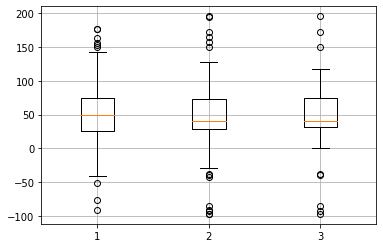

In [ ]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))

data_multi = [data, d2, d2[::2]]

# Multiple box plots on one Axes
fig, ax = plt.subplots()
ax.boxplot(data_multi)

plt.grid()
plt.show()

##Advanced Options for Plotting


**``ax.set_xscale()``**, **``ax.set_yscale()``**: Set axes' scales: 'linear', 'log', 'symlog', ... 


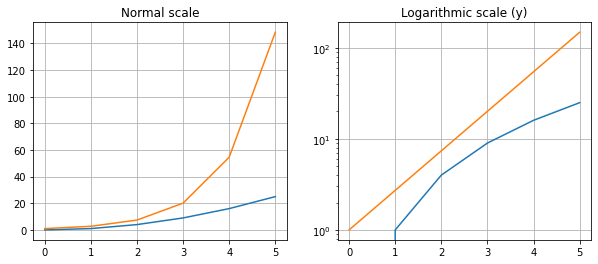

In [ ]:
x = np.linspace(0,5,6)

fig, axes = plt.subplots(1, 2, figsize=(10,4))
      
axes[0].plot(x, x**2, x, np.exp(x))
axes[0].set_title("Normal scale")
axes[0].grid()

axes[1].plot(x, x**2, x, np.exp(x))
axes[1].set_yscale("log")
axes[1].set_title("Logarithmic scale (y)");
axes[1].grid()

plt.show()

**``ax.set_xticks()``**, **``ax.set_yticks()``**: Set a list of positions at which ticks should be placed. If you pass an empty list, it disables ticks. 

**``ax.set_xticklabels()``**, **``ax.set_yticklabels()``**: Set a list of explicit labels to place at the given locations. 

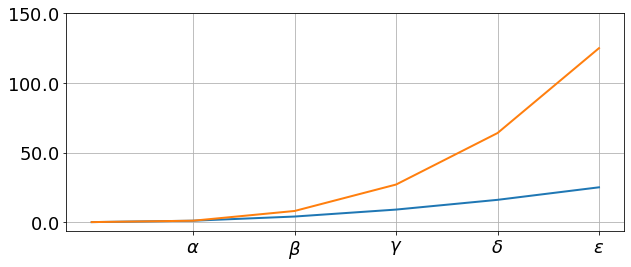

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(x, x**2, x, x**3, lw=2)

ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels([r'$\alpha$', r'$\beta$', r'$\gamma$', r'$\delta$', r'$\epsilon$'], fontsize=18)

yticks = [0, 50, 100, 150]
ax.set_yticks(yticks)
ax.set_yticklabels(["$%.1f$" % y for y in yticks], fontsize=18); 

ax.grid()
plt.show()

**``ax.twinx()``**, **``ax.twiny()``**: Make and return a second axes that shares the x- or y-axis. The new axes will overlay ax. 

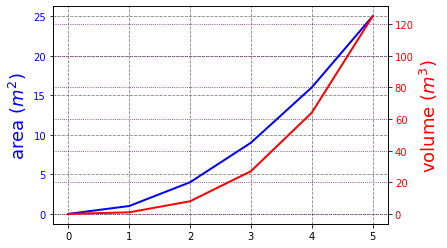

In [ ]:
fig, ax1 = plt.subplots()

ax1.plot(x, x**2, lw=2, color="blue")
ax1.set_ylabel(r"area $(m^2)$", fontsize=18, color="blue")
for label in ax1.get_yticklabels():
    label.set_color("blue")
    
ax2 = ax1.twinx()
ax2.plot(x, x**3, lw=2, color="red")
ax2.set_ylabel(r"volume $(m^3)$", fontsize=18, color="red")
for label in ax2.get_yticklabels():
    label.set_color("red")

ax1.grid(ls='--', color='grey')
ax2.grid(ls=':', color='purple')
plt.show()

# Quiz


## Quiz 1

* Create a figure and axes object called ``fig`` and ``ax`` using ``plt.subplots()``.

* Plot $(x,y)$ on that canvas and set the labels and titles to match the plot below.
  * `x`: integers in range [0, 100) (0 is inclusive, 100 is exclusive).
  * $y = x^2$
  * dotted line, green color, linewidth=2.5
  * label on x-axis: 'x', label on y-axis: 'y', 
  * title of the figure: 'Quiz 1'

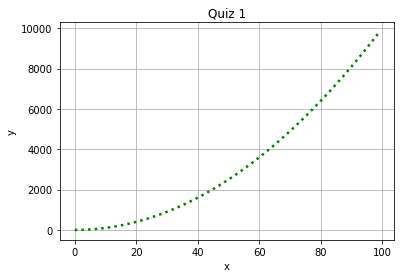






In [ ]:
# create x, y (numpy array)



In [ ]:
# create fig, ax


# plot (x,y)


# set labels of x,y axis, title


plt.grid()
plt.show()

## Quiz 2

* Create the $1 \times 2$ plot using ``plt.subplots()``: number of rows is 1 and number of columns is 2. Create a figure and and axes object called ``fig`` and ``axes``.

* Plot $(x,y)$ on the left ax and $(x,z)$ on the right ax. 
  * $x$: integers in range [0,10] (0 and 10 are inclusive)

  * $y = x^2$
  * line style 'solid', blue color, marker star
  
  * $z = x^{3.5}$
  * line style 'dashed', purple color, marker circle

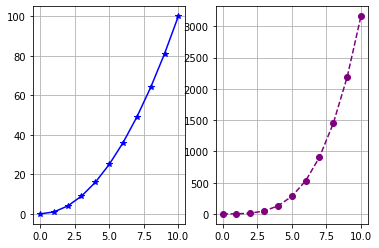


In [ ]:
# Create x, y, z (numpy array)



In [ ]:
# Create fig, axes using plt.subplots


# Plot (x,y) on the first (left) ax: axes[0]


# Plot (x,z) on the second (right) ax: axes[1]


axes[0].grid()
axes[1].grid()
plt.show()

* Create another $1 \times 2$ figure that plots $(x,y)$ and $(x,z)$, but with the y-axis being the 'log' scale.
  * use ``set_yscale`` method
  
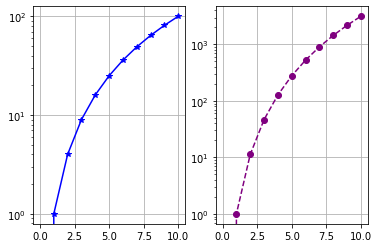

In [ ]:
# Create x, y, z (numpy array)



In [ ]:
# Create fig, axes using plt.subplots


# Plot (x,y) on the first (left) ax: axes[0]


# Plot (x,z) on the second (right) ax: axes[1]


# Set 'log' yscales: for both left and right axes


axes[0].grid()
axes[1].grid()
plt.show()

## Quiz 3

Create a bar plot to match the plot below

* A stacked bar plot: bottom bar represents the first column of the ``data``, and top bar represents the second column of the ``data``

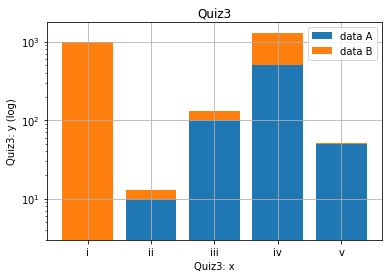

In [ ]:
dataA = np.array([3,10,100,500,50])
dataB = np.array([1000,3,30,800,1])

ind = np.arange(len(dataA))
labels = ['i', 'ii', 'iii', 'iv', 'v']

In [ ]:
# Create fig, ax object


# Create the first bar (dataA)


# Create the second bar (dataB)


# Set labels of x,y axis, title


# Set log yscale


# Make desired xticks


ax.legend(loc='best')
ax.grid()
plt.show()